The following contains data from the Sloan Digital Sky Survey of M106, a spiral galaxy, in Canes Venatici.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from astropy.io import fits

In [3]:
m106657=fits.open('hst_13773_04_wfc3_uvis_f657n_drz.fits')
m106547=fits.open('hst_13773_04_wfc3_uvis_f547m_drz.fits')

In [4]:
m106657

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000025801B548B0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x0000025801C37FA0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x0000025801C37F40>, <astropy.io.fits.hdu.image.ImageHDU object at 0x0000025801C5E340>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000025801C5E580>, <astropy.io.fits.hdu.image.ImageHDU object at 0x00000258022E5D30>]

In [5]:
m106657.info()

Filename: hst_13773_04_wfc3_uvis_f657n_drz.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     910   ()      
  1  SCI           1 ImageHDU        88   (6068, 6006)   float32   
  2  WHT           1 ImageHDU        47   (6068, 6006)   float32   
  3  CTX           1 ImageHDU        42   (6068, 6006)   int32   
  4  HDRTAB        1 BinTableHDU    557   6R x 274C   [9A, 3A, J, D, D, D, D, D, D, D, D, D, D, D, D, J, 11A, 9A, 7A, 18A, 4A, D, D, D, D, 3A, D, D, D, D, D, D, D, D, D, D, D, D, J, J, 8A, 23A, D, D, D, D, J, J, 8A, 23A, 9A, 18A, 4A, J, D, D, D, J, J, J, J, 23A, D, D, D, D, J, J, 4A, 3A, 4A, J, D, D, D, 23A, 1A, J, D, D, D, 4A, 1A, 12A, 12A, 8A, 23A, D, D, 10A, 10A, D, D, D, 4A, 3A, 3A, 4A, 8A, 7A, D, J, D, 6A, 9A, 8A, D, D, 4A, 18A, 3A, J, 5A, 3A, D, 10A, 8A, 8A, 23A, D, D, D, 3A, 1A, D, 23A, D, D, D, 3A, J, 1A, 4A, D, 3A, 6A, D, D, D, D, D, 23A, D, D, D, D, D, 1A, J, J, J, J, D, 3A, J, D, 5A, 7A, D, D, D, D, D, D, D, D, D, D, D

# The HST User manual mentions 5 arrays in a fits file.

 ## Primary containing data about the scan
 
 ### SCI
 
 This image contains the data from the focal plane array (FPA) detectors. In raw data files, the science array is an integer (16-bit) image in units of data numbers, or DN. In calibrated data files, it is a floating-point value image in physical units of electrons (UVIS) or electrons per second (IR).
 
 ### ERR (likely WHT)
 
 This is a floating-point image that contains an estimate of the statistical uncertainty associated with each corresponding science image pixel. It is expressed as a real number of signal units or signal rates (as appropriate for the units of the science image). The values for this array are calculated during calibration with the calwf3 task, combining detector read noise, Poisson noise in the detected signal, and uncertainties from applied calibration reference data.
 
 ### DQ (likely CTX)
 This array contains 16 *(likely 32 here)* independent flags indicating various status and problem conditions associated with each corresponding pixel in the science image. Each flag has a true (set) or false (unset) state and is encoded as a bit in a 16-bit integer word. Users are advised that this word should not be interpreted as a simple integer, but must be converted to base-2 and each bit interpreted as a flag. Table 2.6 lists the WFC3 data quality flags.
 
 ### Number of Samples Array (SAMP)(likely HDRTAB)
 This array is present only for IR data. It is a 16-bit integer array and contains the number of samples used to derive the corresponding pixel values in the science image. For raw and intermediate data files, the sample values are set to the number of readouts that contributed to the science image. For calibrated files, the SAMP array contains the total number of valid samples used to compute the final science image pixel value, obtained by combining the data from all the readouts and rejecting cosmic ray hits and saturated pixels. Similarly, when multiple exposures (i.e., REPEAT-OBS) are combined to produce a single image, the SAMP array contains the total number of samples retained at each pixel for all the exposures.
 
 ### Integration Time Array (TIME) ( likely EXP)
 This array is present only for IR data. This is a floating-point array that contains the effective integration time associated with each corresponding science image pixel value. For raw and intermediate data files, the time value is the total integration time of data that contributed to the science image. For calibrated datasets, the TIME array contains the combined exposure time of the valid readouts or exposures that were used to compute the final science image pixel value, after rejection of cosmic rays and saturated pixels from the intermediate data.

In [6]:
m106657[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 6068                                                  
NAXIS2  =                 6006                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'SCI     '           / extension name                                 
EXTVER  =                    1 / extension version number                       
ROOTNAME= 'icnk04vdq                         ' / rootname of the observation set
EXPNAME = 'icnk04vdq                ' / exposure identifier                     
BUNIT   = 'ELECTRONS/S'     

In [7]:
m106657[2].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 6068                                                  
NAXIS2  =                 6006                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'WHT     '           / extension name                                 
EXTVER  =                    1 / extension version number                       
ROOTNAME= 'icnk04vdq                         ' / rootname of the observation set
EXPNAME = 'icnk04vdq                ' / exposure identifier                     
BUNIT   = 'UNITLESS'        

In [8]:
from astropy.visualization import make_lupton_rgb

In [9]:
r=m106657[1].data
g=m106547[1].data

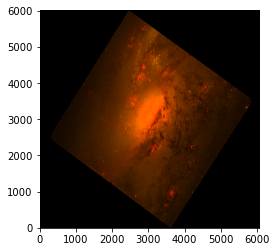

In [10]:
rgb_default = make_lupton_rgb(r,g/11,r*0,stretch=0.06,Q=2)

plt.imshow(rgb_default, origin='lower')
plt.savefig('M106-1.jpg')

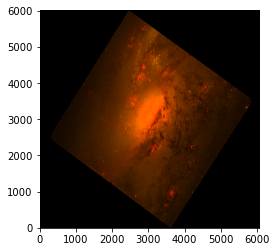

In [11]:
rgb_default = make_lupton_rgb(r,g/11,r*0,stretch=0.06,Q=2)

plt.imshow(rgb_default, origin='lower')
plt.savefig('M106-1.svg',format='svg',dpi=1200)

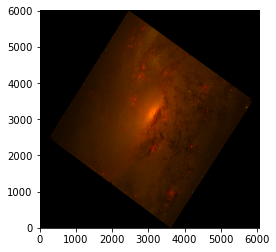

In [12]:
rgb_default = make_lupton_rgb(r,(g)/11,r*0,stretch=0.06,Q=10)

plt.imshow(rgb_default, origin='lower')
plt.savefig('M106-2.jpg')

## Understanding the astropy.visualisation.make_lupton_rgb function

The function is used to create an 8-bit rgb image using data from three different filters.

-The first three parameters are for the red, green, blue ranges of colours in the final output. It accepts a numpy.ndarray for each of r, g, b arguments.  

-If any one colour have high intensity, python gives the facility to simply divide/multiply the array by a constant. This **scales** the output of that colour. For example, in M16 observations of the Hubble Space telescope, the 657nm intensity is much higher than others. As a result, it must be scaled down by factor of 1/7 for better result. 

-Next is actually a minimum argument, which we do not use here, and is used to set a threshold for intensity to be plotted. This can be useful to **get rid of noise** in the image which is generally of lower intensity. It's default value is 0. 

-The stretch value (default=5) is used to specify linear stretch of the image. It is dampen the intensity of the signal by a factor equal to it's value. This also allows us to amplify the signal intensity for better viewing. It increases the **brightness** of the image.

-The Q value (default=8) is the asinh softening parameter. It has roughly an inverse relationship with the **contrast** of the signal intensities in output.

-Finally, a filename parameter can accept a string to the file in the project folder where the image output can be overwritten.